In [28]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread
import pandas as pd
import scipy
import tensorflow.keras.layers as tfl
import tensorflow as tf
from w1_cnn_utils import *

In [2]:
with h5py.File("./datasets/train_happy.h5") as file:
    X_train_orig = file["train_set_x"][:]
    Y_train_orig = file["train_set_y"][:]

with h5py.File("./datasets/test_happy.h5") as file:
    X_test_orig = file["test_set_x"][:]
    Y_test_orig = file["test_set_y"][:]
    classes = np.array(file["list_classes"][:])

# Normalize the images
X_train = X_train_orig/255.
X_test = X_test_orig/255.

# Reshape
Y_train = np.expand_dims(Y_train_orig.T, axis=1)
Y_test = np.expand_dims(Y_test_orig.T, axis=1)

print ("number of training examples = " + str(X_train.shape[0]))
print ("number of test examples = " + str(X_test.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(Y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("Y_test shape: " + str(Y_test.shape))


number of training examples = 600
number of test examples = 150
X_train shape: (600, 64, 64, 3)
Y_train shape: (600, 1)
X_test shape: (150, 64, 64, 3)
Y_test shape: (150, 1)


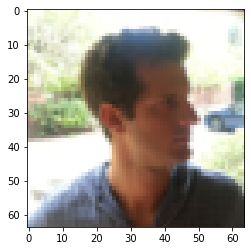

In [3]:
idx = 220
plt.imshow(X_train_orig[idx])
plt.show()

In [4]:
def happyModel():
    model = tf.keras.Sequential([
            tf.keras.layers.ZeroPadding2D(padding=3,input_shape=(64,64,3)),
            tf.keras.layers.Conv2D(kernel_size = 7, filters = 32, strides = 1),
            tf.keras.layers.BatchNormalization(axis = 3),
            tf.keras.layers.ReLU(),
            tf.keras.layers.MaxPooling2D(),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = 1, activation = "sigmoid")
        ])
    
    return model
happy_model = happyModel()
happy_model.compile(
    optimizer=tf.keras.optimizers.Adam(.001), 
    loss = tf.keras.losses.BinaryCrossentropy(), 
    metrics=["accuracy"]
    )
happy_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 zero_padding2d (ZeroPadding  (None, 70, 70, 3)        0         
 2D)                                                             
                                                                 
 conv2d (Conv2D)             (None, 64, 64, 32)        4736      
                                                                 
 batch_normalization (BatchN  (None, 64, 64, 32)       128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 64, 64, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 32, 32, 32)       0         
 )                                                               
                                                        

In [5]:
# Strat the training process
happy_model.fit(X_train, Y_train, epochs=15, batch_size=16)

Epoch 1/15
38/38 [==============================] - 2s 40ms/step - loss: 0.7042 - accuracy: 0.7567
Epoch 2/15
38/38 [==============================] - 1s 39ms/step - loss: 0.1679 - accuracy: 0.9383
Epoch 3/15
38/38 [==============================] - 1s 37ms/step - loss: 0.1960 - accuracy: 0.9250
Epoch 4/15
38/38 [==============================] - 2s 41ms/step - loss: 0.2124 - accuracy: 0.9133
Epoch 5/15
38/38 [==============================] - 1s 38ms/step - loss: 0.1132 - accuracy: 0.9600
Epoch 6/15
38/38 [==============================] - 1s 37ms/step - loss: 0.1403 - accuracy: 0.9567
Epoch 7/15
38/38 [==============================] - 2s 40ms/step - loss: 0.0727 - accuracy: 0.9767
Epoch 8/15
38/38 [==============================] - 1s 37ms/step - loss: 0.0680 - accuracy: 0.9717
Epoch 9/15
38/38 [==============================] - 2s 40ms/step - loss: 0.1201 - accuracy: 0.9633
Epoch 10/15
38/38 [==============================] - 2s 42ms/step - loss: 0.1093 - accuracy: 0.9633
Epoch 11/

In [6]:
happy_model.evaluate(X_test, Y_test)

5/5 [==============================] - 0s 15ms/step - loss: 0.5689 - accuracy: 0.8067


[0.5689118504524231, 0.8066666722297668]

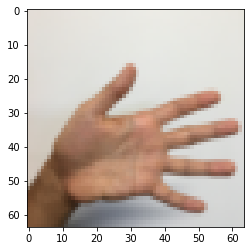

In [7]:
with h5py.File("./datasets/train_signs.h5") as file:
    X_train_orig = file["train_set_x"][:]
    Y_train_orig = file["train_set_y"][:]

with h5py.File("./datasets/test_signs.h5") as file:
    X_test_orig = file["test_set_x"][:]
    Y_test_orig = file["test_set_y"][:]
    classes = np.array(file["list_classes"][:])

# Normalize the images
X_train = X_train_orig/255.
X_test = X_test_orig/255.

def oneHot(Y, C):
    return np.eye(C)[Y.reshape(-1).T]

# Reshape
Y_train = oneHot(Y_train_orig, np.unique(Y_train_orig).shape[0]).T
Y_test = oneHot(Y_test_orig, np.unique(Y_train_orig).shape[0]).T

X_train = X_train_orig/255.
X_test = X_test_orig/255.
Y_train = convert_to_one_hot(Y_train_orig, 6).T
Y_test = convert_to_one_hot(Y_test_orig, 6).T

idx = 0
plt.imshow(X_train_orig[idx])
plt.show()

In [8]:
# GRADED FUNCTION: convolutional_model

def convolutional_model(input_shape):
    
    input_img = tf.keras.Input(shape=input_shape)
    Z1 = tf.keras.layers.Conv2D(filters = 8, kernel_size = (4,4), strides = 1, padding = "same")(input_img)
    A1 = tf.keras.layers.ReLU()(Z1)
    P1 = tf.keras.layers.MaxPooling2D(strides=8, padding="same", pool_size=(8,8))(A1)
    Z2 = tf.keras.layers.Conv2D(filters = 16, kernel_size = (2,2), strides = 1, padding = "same")(P1)
    A2 = tf.keras.layers.ReLU()(Z2)
    P2 = tf.keras.layers.MaxPooling2D(strides=4, padding="same", pool_size=(4,4))(A2)
    F = tf.keras.layers.Flatten()(P2)
    outputs = tf.keras.layers.Dense(units = 6, activation = "softmax")(F)
    
    model = tf.keras.Model(inputs=input_img, outputs=outputs)
    return model

In [9]:
conv_model = convolutional_model((64, 64, 3))
conv_model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
conv_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 8)         392       
                                                                 
 re_lu_1 (ReLU)              (None, 64, 64, 8)         0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 16)          528       
                                                                 
 re_lu_2 (ReLU)              (None, 8, 8, 16)          0         
                                                             

 max_pooling2d_2 (MaxPooling  (None, 2, 2, 16)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 6)                 390       
                                                                 
Total params: 1,310
Trainable params: 1,310
Non-trainable params: 0
_________________________________________________________________


In [10]:
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, Y_train)).batch(64)
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, Y_test)).batch(64)
history = conv_model.fit(train_dataset, epochs=100, validation_data=test_dataset)

Epoch 1/100


17/17 [==============================] - 1s 34ms/step - loss: 1.8131 - accuracy: 0.1704 - val_loss: 1.7885 - val_accuracy: 0.1917
Epoch 2/100
17/17 [==============================] - 0s 29ms/step - loss: 1.7888 - accuracy: 0.2046 - val_loss: 1.7835 - val_accuracy: 0.2500
Epoch 3/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7853 - accuracy: 0.2046 - val_loss: 1.7811 - val_accuracy: 0.2250
Epoch 4/100
17/17 [==============================] - 0s 29ms/step - loss: 1.7826 - accuracy: 0.2213 - val_loss: 1.7787 - val_accuracy: 0.2750
Epoch 5/100
17/17 [==============================] - 0s 27ms/step - loss: 1.7788 - accuracy: 0.2435 - val_loss: 1.7758 - val_accuracy: 0.2750
Epoch 6/100
17/17 [==============================] - 0s 28ms/step - loss: 1.7746 - accuracy: 0.2602 - val_loss: 1.7722 - val_accuracy: 0.3000
Epoch 7/100
17/17 [==============================] - 0s 29ms/step - loss: 1.7685 - accuracy: 0.2889 - val_loss: 1.7673 - val_accuracy: 0.3000
Epoch 8/100
17/17 

The training Process


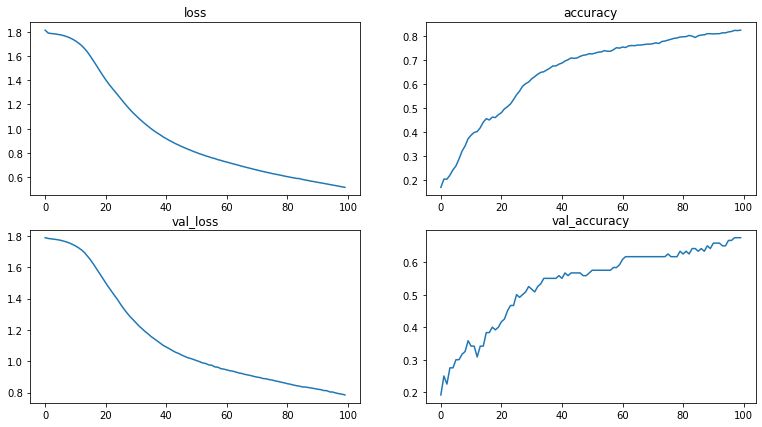

In [37]:
print("The training Process")
plt.figure(figsize = (13,7))
plt.subplot(2,2,1)
plt.title("loss")
plt.plot(history.history["loss"])

plt.subplot(2,2,2)
plt.title("accuracy")
plt.plot(history.history["accuracy"])

plt.subplot(2,2,3)
plt.title("val_loss")
plt.plot(history.history["val_loss"])

plt.subplot(2,2,4)
plt.title("val_accuracy")
plt.plot(history.history["val_accuracy"])
plt.show()

Accuracy: %72.0


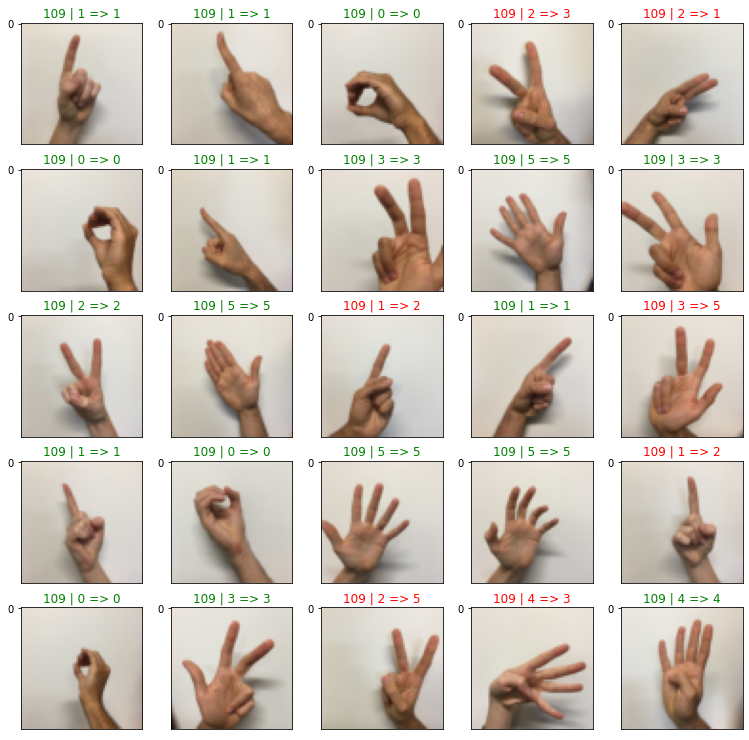

In [148]:
# Randomly select 12 samples and use the CNN to predict their values
idx = []
images = []
imageLabels = []
fig = plt.figure(figsize=(13,13))
for j in range(25):
    # Get the random index
    i = np.random.randint(0, Y_test.shape,1)[0]

    # Don't accept duplicate images
    while i in idx:
        i = np.random.randint(0, Y_test.shape)[0]
        
    idx.append(i)
    images.append(X_test[i])
    imageLabels.append(np.argmax(Y_test[i]))

pred = np.argmax(conv_model.predict(np.array(images), verbose=False), axis = 1)

for j in range(25):
    plt.subplot(5,5,j+1)
    plt.title(f"{i} | {imageLabels[j]} => {pred[j]}", color = "green" if imageLabels[j] == pred[j] else "red")
    plt.imshow(images[j])
    plt.xticks([])
    plt.yticks([0])
    plt.plot()

acc = imageLabels==pred
print(f"Accuracy: %{len(acc[acc == True])/len(acc)*100}")